<a href="https://colab.research.google.com/github/n23950629/My-python-work/blob/master/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 讀入套件

In [0]:
from keras.datasets import cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

###看數據內容

In [0]:
class_names = ['airplain','automobile' ,'bird','cat','deer','dog','frog','horse','ship','truck'] 

In [65]:
print( 'train feature datas =', x_train.shape )
print( 'test feature datas =', x_test.shape )

train feature datas = (50000, 32, 32, 3)
test feature datas = (10000, 32, 32, 3)


In [0]:
# 訓練資料：測試用圖片資料有 50000 筆，每個圖片長寬為 32X32，3 表示RGB三原色
# 測試資料：測試用圖片資料有 10000 筆，每個圖片長寬為 32X32，3 表示RGB三原色

In [67]:
x_train[n]

array([[[244, 244, 244],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [117, 117, 117],
        [131, 131, 131],
        [138, 138, 138]],

       [[244, 244, 244],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [123, 123, 123],
        [134, 134, 134],
        [138, 138, 138]],

       [[248, 248, 248],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [121, 121, 121],
        [125, 125, 125],
        [127, 127, 127]],

       ...,

       [[133, 133, 133],
        [125, 125, 125],
        [122, 122, 122],
        ...,
        [ 41,  41,  41],
        [ 62,  62,  62],
        [ 74,  74,  74]],

       [[132, 132, 132],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [ 45,  45,  45],
        [ 60,  60,  60],
        [ 70,  70,  70]],

       [[134, 134, 134],
        [130, 130, 130],
        [128, 128, 128],
        ...,
        [ 53,  53,  53],
        [ 62,  62,  62],
        [ 68,  68,  68]]

In [68]:
y_train[n]

array([9], dtype=uint8)

這是 [array([9], dtype=uint8)]


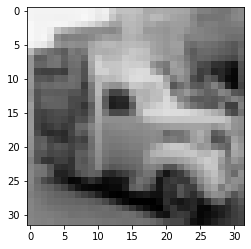

In [69]:
n=9487
plt.imshow(x_train[n])
print('這是', [y_train[n]])

### 資料準備

In [0]:
x_train = x_train / 255  # RGB 顏色數值為 0~255, 除以 255, 讓顏色數值收斂到 0~1

In [0]:
x_test = x_test / 255 

In [72]:
print( 'train feature vector datas =', x_train )

train feature vector datas = [[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0

### 建造

In [0]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [74]:
y_train[9487]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
model = Sequential()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import  SGD


In [0]:
model.add( Conv2D( input_shape = (32, 32, 3),
                  filters = 8 ,
                  kernel_size = (5, 5) ,
                  padding = 'same' , 
                  activation = 'relu'))          

In [0]:
model.add( MaxPooling2D( pool_size = (2, 2) ) )

In [0]:
model.add( Flatten() )

In [0]:
model.add( Dense( units = 256                   
                , kernel_initializer = 'normal' 
                , activation = 'relu'          
                ))

In [0]:
model.add( Dense( units = 10                   
                , kernel_initializer = 'normal'
                , activation = 'softmax'       
                ))

### 組裝

In [0]:
model.compile( loss='categorical_crossentropy' 
             , optimizer = 'adam'              
             , metrics = ['accuracy'] 
             )

In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 8)         608       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 527,722
Trainable params: 527,722
Non-trainable params: 0
_________________________________________________________________


### 訓練

In [83]:
result=model.fit(x_train, y_train, batch_size=200, epochs=5)

Epoch 1/5
250/250 [==============================] - 36s 143ms/step - loss: 1.6661 - accuracy: 0.4040
Epoch 2/5
250/250 [==============================] - 33s 130ms/step - loss: 1.3661 - accuracy: 0.5132
Epoch 3/5
250/250 [==============================] - 33s 131ms/step - loss: 1.2670 - accuracy: 0.5502
Epoch 4/5
250/250 [==============================] - 33s 131ms/step - loss: 1.1850 - accuracy: 0.5819
Epoch 5/5
250/250 [==============================] - 33s 131ms/step - loss: 1.1294 - accuracy: 0.6017


### 訓練成果

In [84]:
final_result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
def my_predict(n):

    print('我可愛的CNN預測是', class_names[final_result[n]])
    X = x_test[n].reshape(32,32,3)
    plt.imshow(X)

In [0]:
from ipywidgets import interact_manual

In [125]:
interact_manual(my_predict, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict>